In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clt
import matplotlib.patches as patches
import matplotlib as mpl
import TDAtools as TDAtl
import matplotlib.gridspec as gridspec

sns.set_style("ticks")

palette = 'Accent'

# Parameters
heading_text_params = {'fontweight': 'bold', 'fontsize': 23}
title_text_params = {'fontweight': 'bold', 'fontsize': 23}
subtitle_text_params = {'fontsize': 20}

In [19]:

fig = plt.figure(figsize=(15, 25))

gs0 = gridspec.GridSpec(5, 6, figure=fig, hspace=.6)

gs00 = gridspec.GridSpecFromSubplotSpec(1, 6, subplot_spec=gs0[0, :], wspace=1.5)
ax1 = [fig.add_subplot(gs00[0]), fig.add_subplot(gs00[1:5]), fig.add_subplot(gs00[5])]

gs01 = gridspec.GridSpecFromSubplotSpec(1, 6, subplot_spec=gs0[1, :], wspace=1.5)
ax2 = [fig.add_subplot(gs01[0]), fig.add_subplot(gs01[1:5]), fig.add_subplot(gs01[5])]

gs02 = gridspec.GridSpecFromSubplotSpec(1, 6, subplot_spec=gs0[2, :], wspace=1.25)
ax3 = [fig.add_subplot(gs02[0:3]), fig.add_subplot(gs02[3:])]

gs03 = gridspec.GridSpecFromSubplotSpec(1, 6, subplot_spec=gs0[3, :], wspace=1.25)
ax4 = [fig.add_subplot(gs03[0:3]), fig.add_subplot(gs03[3:])]

gs04 = gridspec.GridSpecFromSubplotSpec(1, 6, subplot_spec=gs0[4, :], wspace=1.25)
ax5 = [fig.add_subplot(gs04[0:3]), fig.add_subplot(gs04[3:])]

fig

plt.rc('font', size=subtitle_text_params['fontsize'])



In [20]:


def plot_coral_image(ax, image, size=25, colors=('#EE8382', '#508991', '#172A3A')):
    levels = [0, 1, 2]
    cmap, norm = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')

    # Plot
    ax.imshow(image, cmap=cmap, norm=norm)
    ax.set_xticks(np.arange(-.5, size, 1), minor=True)
    ax.set_yticks(np.arange(-.5, size, 1), minor=True)
    ax.set_frame_on(True)
    ax.set_yticks([])
    ax.set_xticks([])
    ax.grid(color='black', linestyle='-', alpha=0.1, linewidth=.2, which='minor')
    ax.tick_params(which='minor', top=[], left=[], right=[], bottom=[])

    return ax


colors = ['#EE8382', '#508991', '#172A3A']
levels = [0, 1, 2]
legend_keys = ['Coral', 'Turf', 'Macroalgae']
cmap_types, norm_types = clt.from_levels_and_colors(levels=levels, colors=colors, extend='max')


def reposition_image(ax, right=True):
    position = ax.get_position().bounds
    if right:
        ax.set_position([position[0] - .055, position[1] - .0575, .11, .11])
    else:
        ax.set_position([position[0] + 0.005, position[1] - .0575, .11, .11])

    return None


def background_image(ax, right=True):
    rect = patches.FancyBboxPatch([2, 2], 20, 20, fill=True, alpha=.75, facecolor="gray", clip_on=False,
                                  zorder=0, boxstyle='round, pad=5')
    style = "Simple, tail_width=1, head_width=8, head_length=8"
    kw = dict(arrowstyle=style, color="gray", facecolor='gray', alpha=.5, linewidth=2)
    if right:
        arw = patches.FancyArrowPatch((25, 25), (43, 26), connectionstyle="arc3,rad=.6", **kw, clip_on=False,
                                      zorder=10)
    else:
        arw = patches.FancyArrowPatch((-1, 25), (-21, 24), connectionstyle="arc3,rad=.6", **kw, clip_on=False,
                                      zorder=10)

    ax.add_patch(arw)

    ax.add_patch(rect)

    return None


# for background of plots

output_facecolor = '#EDEDED'

## A. Initial Profiles

In [21]:

dfs = []
for n, grid in enumerate(['random', 'coral-cluster']):
    df = pd.read_csv('./output/25x25/grid' + str(2 * n) +
                     '/grazing53/threshold146/coral15-macro15-r10-d40-a20-y75-time210-rec10-nsim100.csv')
    df['time'] = df['timestep'] * .1
    df['time'] = df['time'].astype('int')
    df['C'] = round(df.coral_count / (25 ** 2), 2)
    df['T'] = round(df.turf_count / (25 ** 2), 2)
    df['M'] = round(df.macroalgae_count / (25 ** 2), 2)
    df['grid_option'] = grid
    dfs.append(df)


<ipython-input-20-013bc8d841b4>:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arw = patches.FancyArrowPatch((25, 25), (43, 26), connectionstyle="arc3,rad=.6", **kw, clip_on=False,


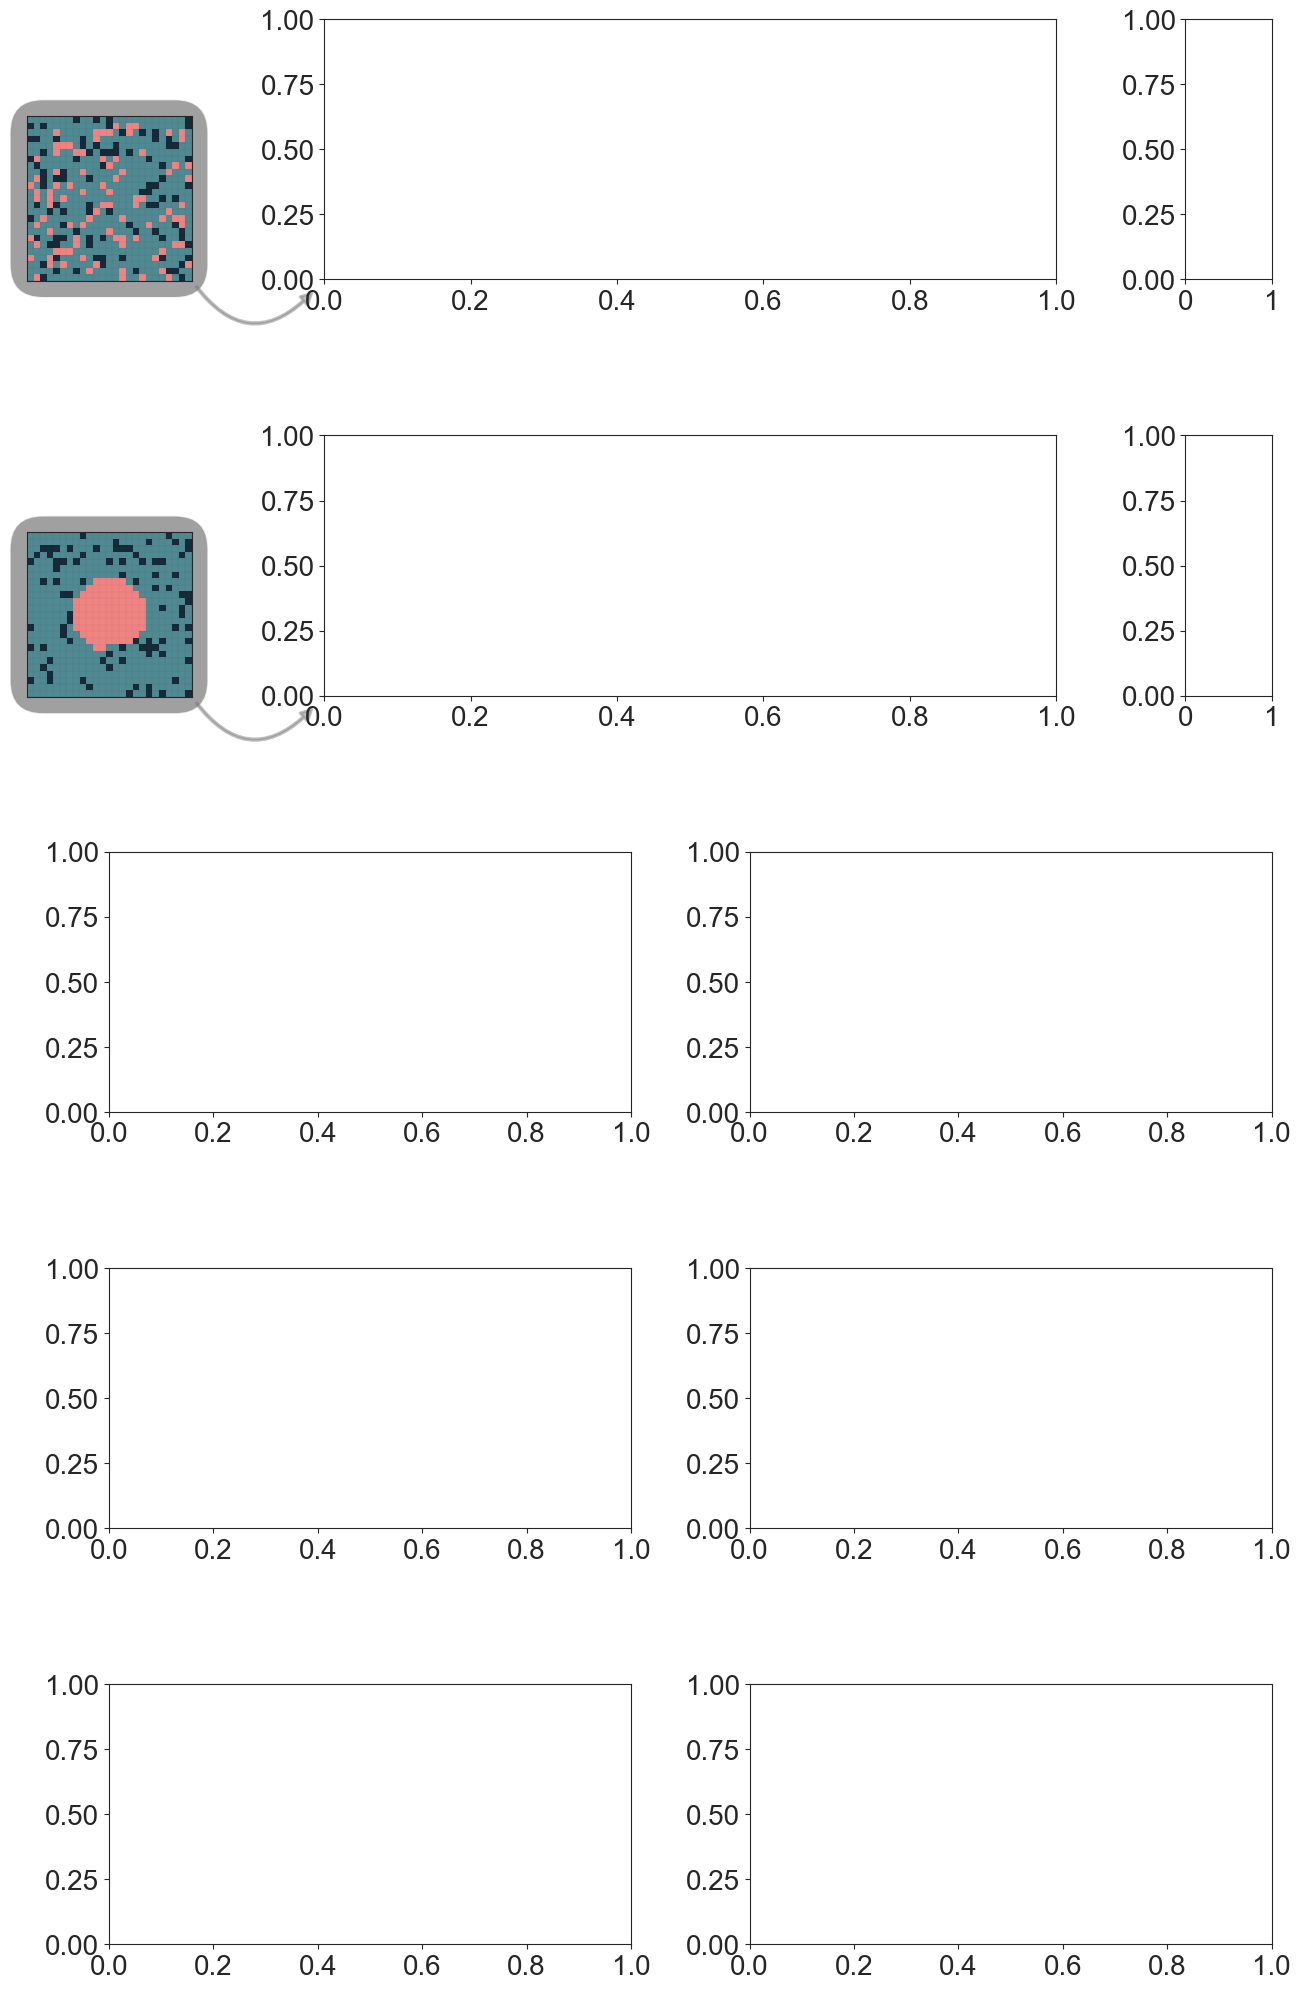

In [22]:


## Plot
axes = [ax1[0], ax2[0]]
for grid_option in range(2):
    ax = axes[grid_option]

    image = np.genfromtxt([dfs[grid_option][(df.timestep == 0) & (df.simulation == 19)]['image'].values[0]
                          .replace('[', '').replace(']', '')])
    image = image.reshape((25, 25))
    ax = plot_coral_image(ax, image)

    reposition_image(ax)
    background_image(ax)

fig


## B. Images at time t=20

<ipython-input-20-013bc8d841b4>:43: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arw = patches.FancyArrowPatch((-1, 25), (-21, 24), connectionstyle="arc3,rad=.6", **kw, clip_on=False,


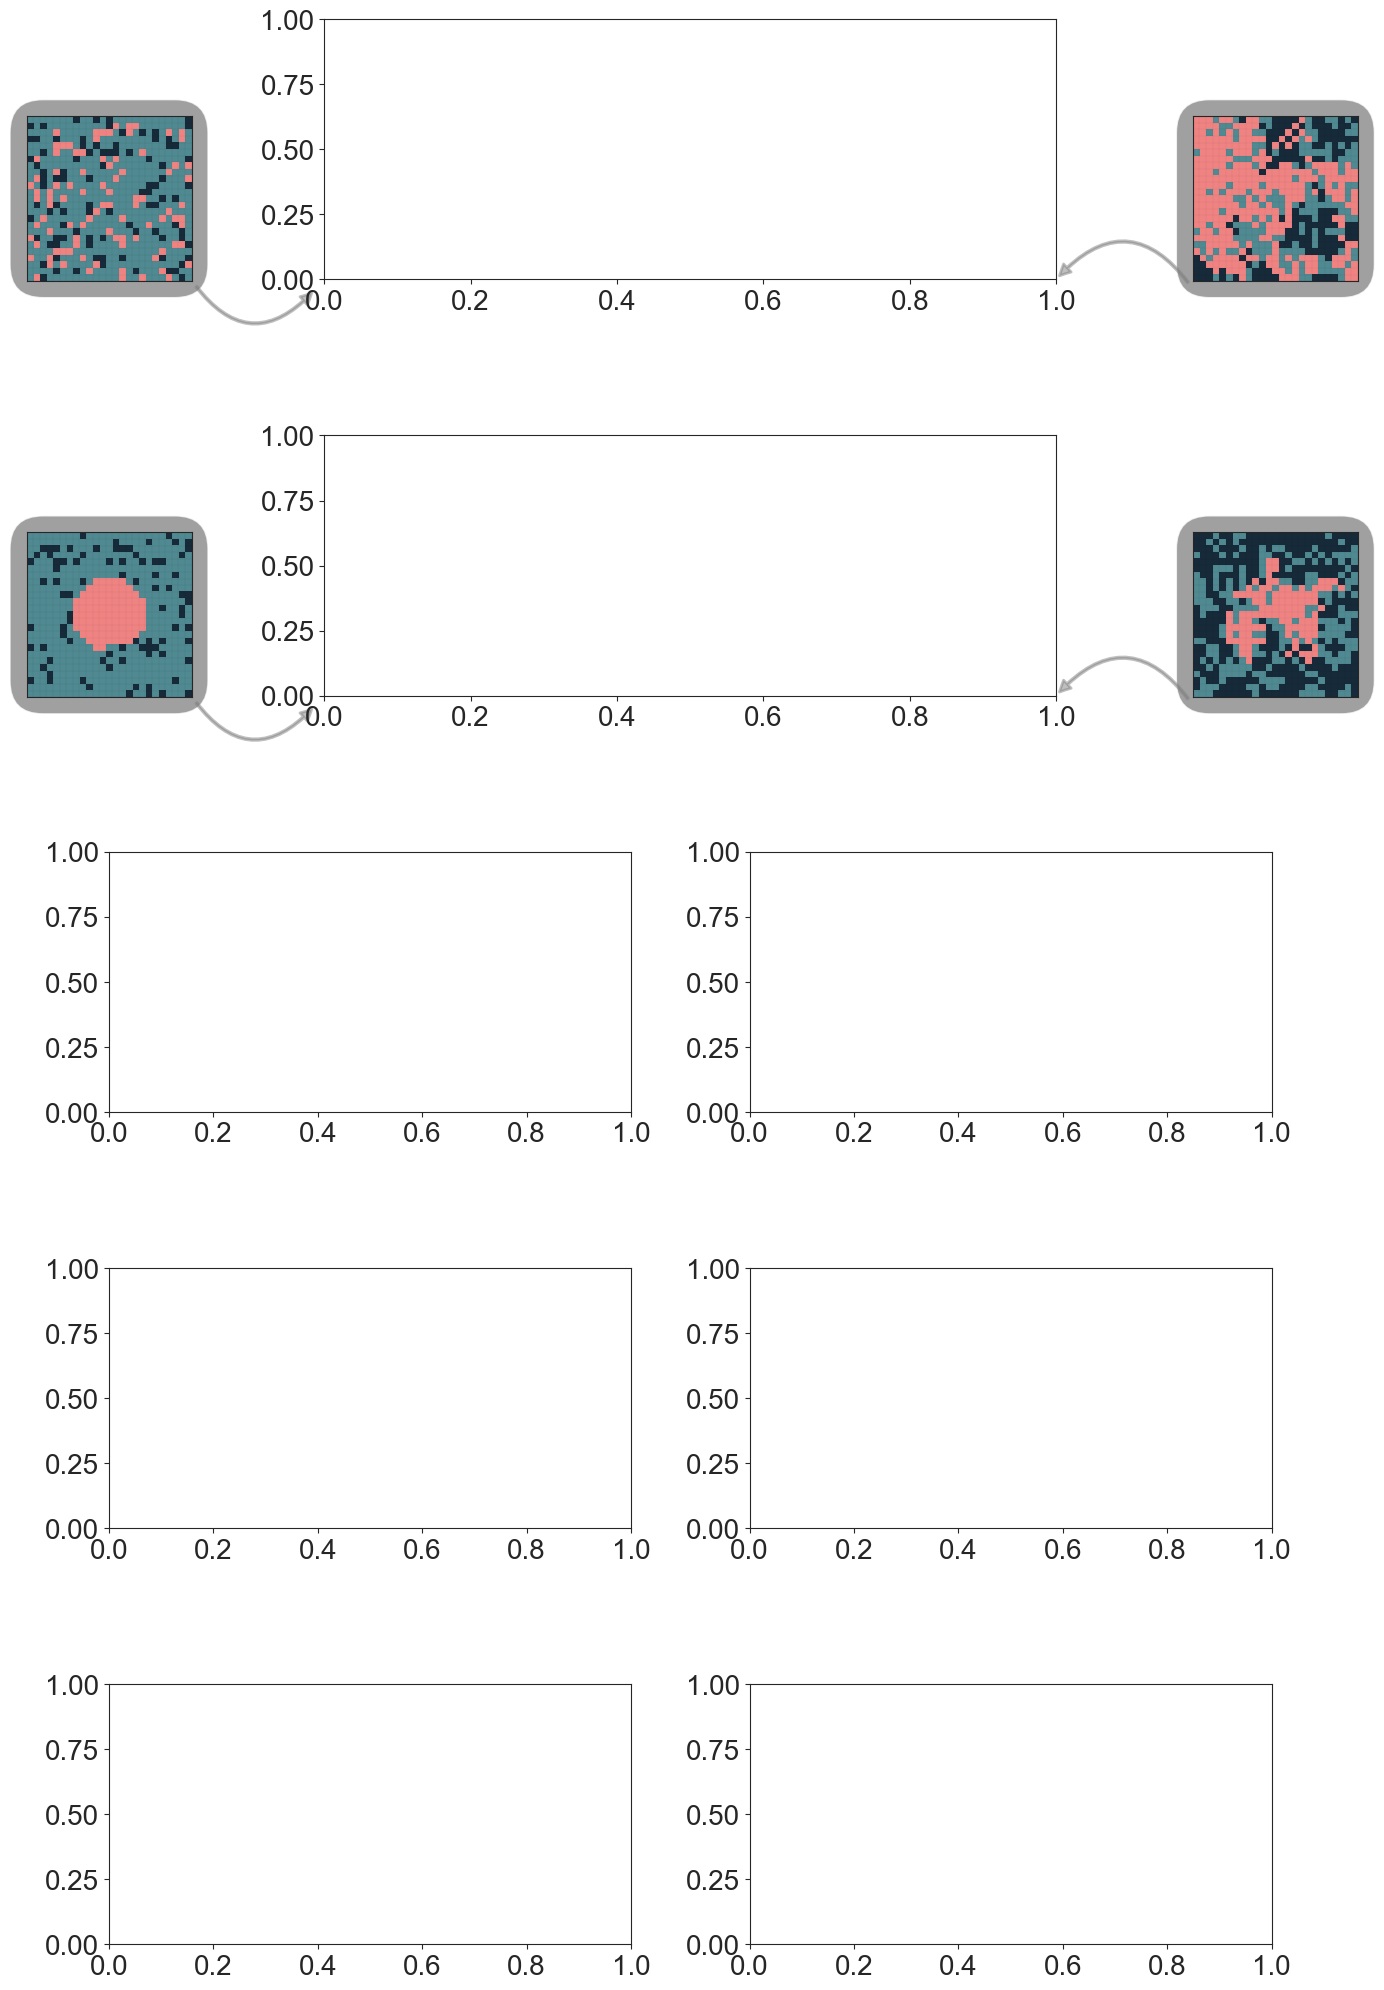

In [23]:

## Plot
axes = [ax1[-1], ax2[-1]]
for grid_option in range(2):
    ax = axes[grid_option]

    image = np.genfromtxt([dfs[grid_option][(df.timestep == 200) & (df.simulation == 19)]['image'].values[0]
                          .replace('[', '').replace(']', '')])
    image = image.reshape((25, 25))
    ax = plot_coral_image(ax, image)

    reposition_image(ax, right=False)
    background_image(ax, right=False)

fig


## C. Box Plot of Evolution

In [24]:

# add in neighbors
df = pd.concat(dfs)
df.loc[df['grid_option'] == 'random', ['initial configuration']] = 'random'
df.loc[df['grid_option'] == 'coral-cluster', ['initial configuration']] = 'coral-cluster'
split = df['coral_neighbors']\
    .str.replace('[', '', regex=True).str.replace(']', '', regex=True).str.replace('[ ]{2,}', ' ', regex=True).\
    str.split(" ", n=2, expand=True)

df['coral_coral_neighbors'] = split[0].replace('', '0').astype(float).replace(np.inf, 0).dropna()
df['coral_turf_neighbors'] = split[1].replace('', '0').astype(float).replace(np.inf, 0).dropna()
df['coral_macro_neighbors'] = split[2].replace('', '0').astype(float).replace(np.inf, 0).dropna()

split = df['turf_neighbors']\
    .str.replace('[', '', regex=True).str.replace(']', '', regex=True).str.replace('[ ]{2,}', ' ', regex=True).\
    str.split(" ", n=2, expand=True)

df['turf_coral_neighbors'] = split[0].replace('', '0').astype(float).replace(np.inf, 0).dropna()
df['turf_turf_neighbors'] = split[1].replace('', '0').astype(float).replace(np.inf, 0).dropna()
df['turf_macro_neighbors'] = split[2].replace('', '0').astype(float).replace(np.inf, 0).dropna()

split = df['macroalgae_neighbors']\
    .str.replace('[', '', regex=True).str.replace(']', '', regex=True).str.replace('[ ]{2,}', ' ', regex=True).\
    str.split(" ", n=2, expand=True)

df['macro_coral_neighbors'] = split[0].replace('', '0').astype(float).replace(np.inf, 0).dropna()
df['macro_turf_neighbors'] = split[1].replace('', '0').astype(float).replace(np.inf, 0).dropna()
df['macro_macro_neighbors'] = split[2].replace('', '0').astype(float).replace(np.inf, 0).dropna()


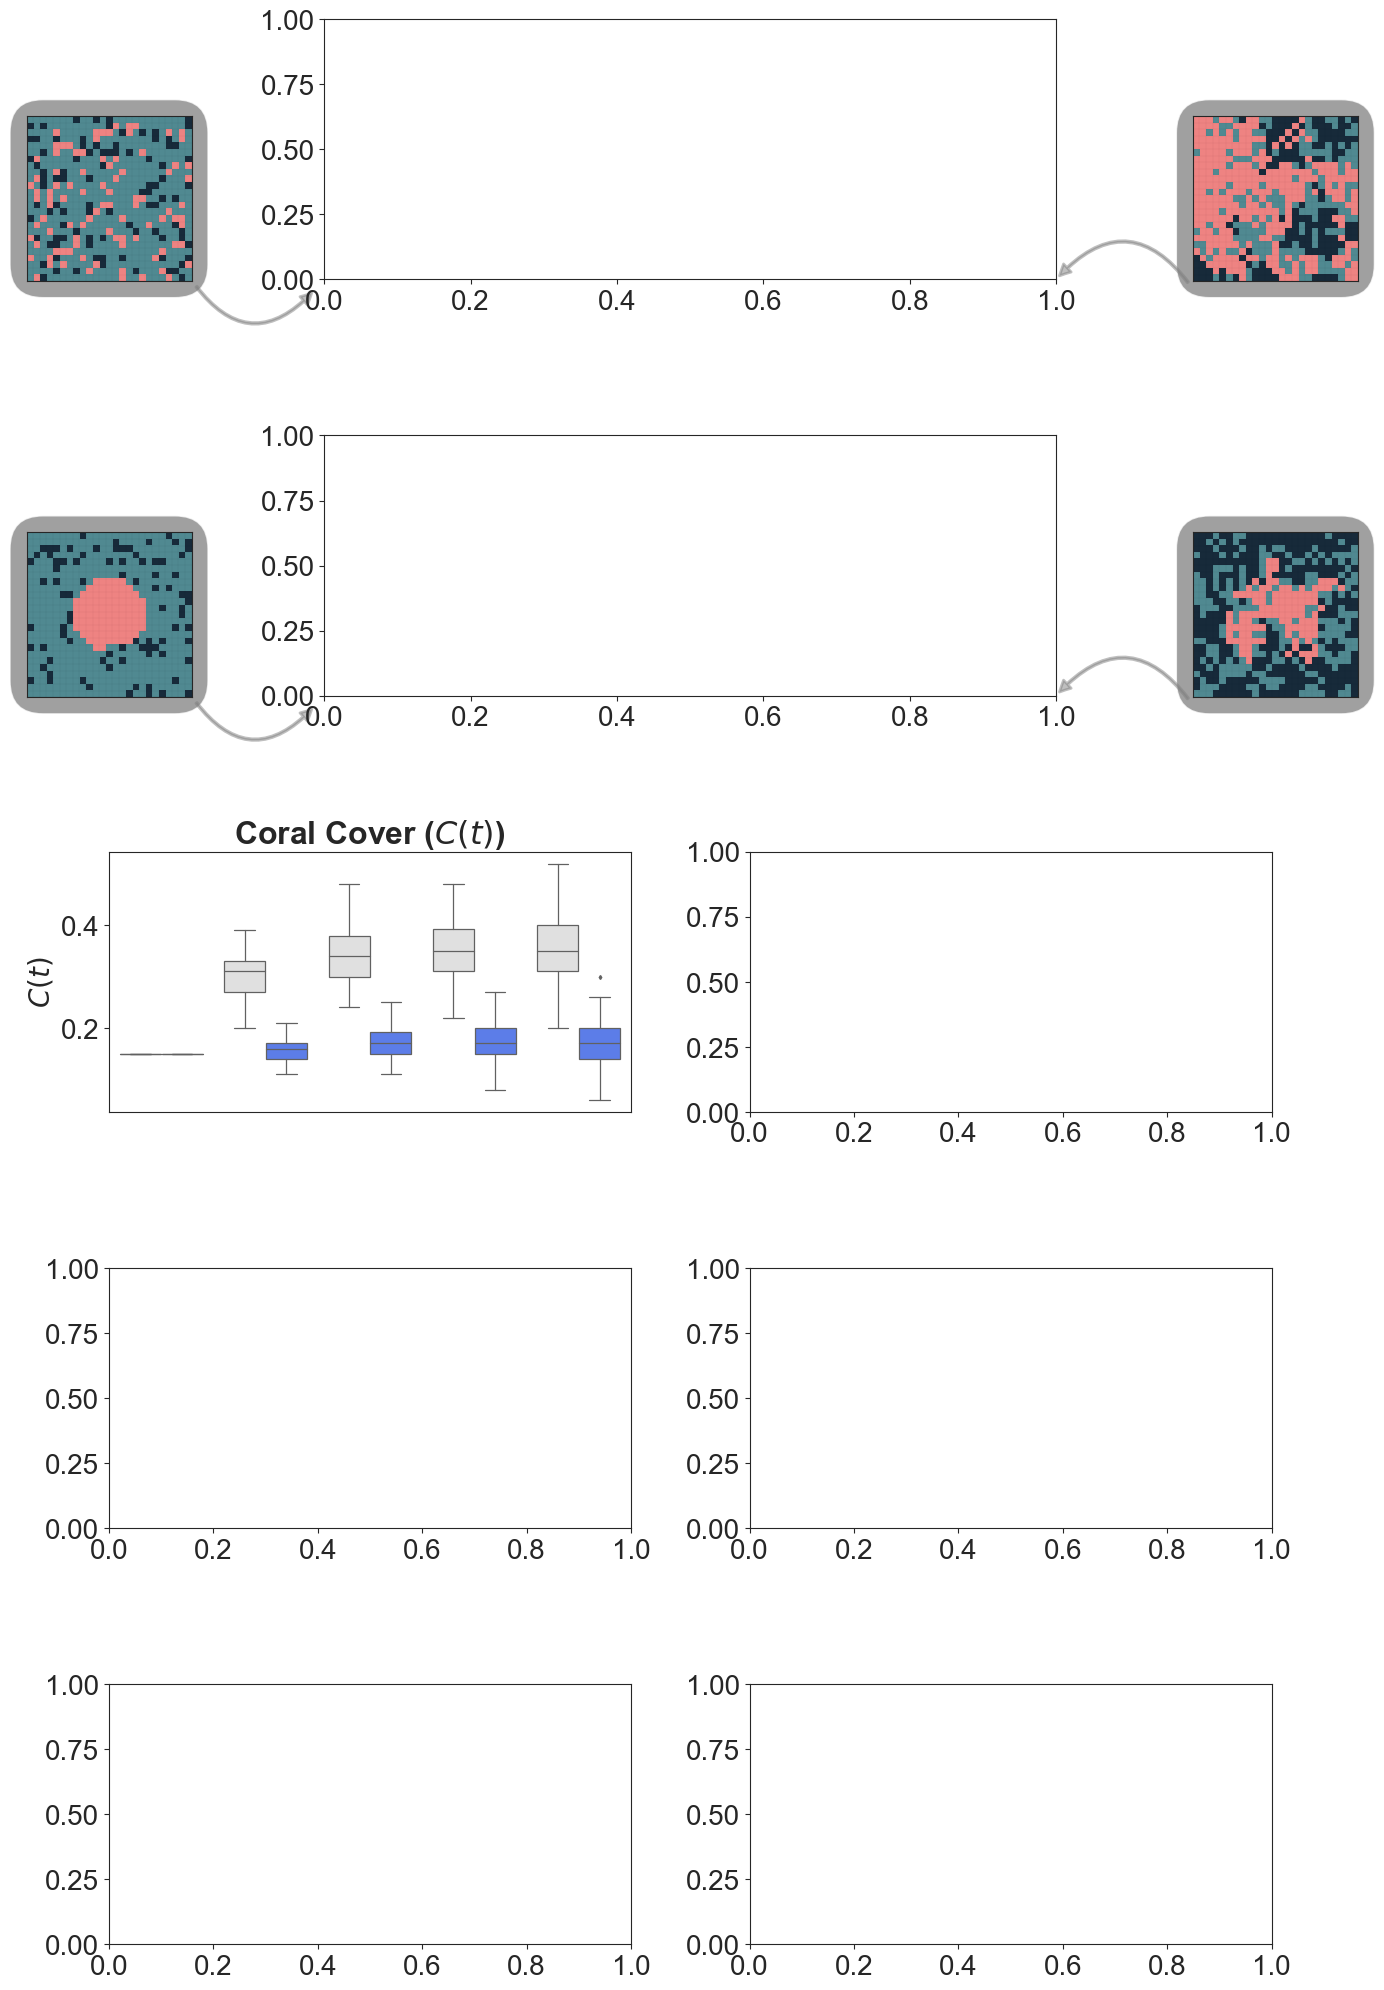

In [25]:
# Grouped boxplot

times = [0, 5, 10, 15, 20]
colors = ["#e0e0e0", "#4571ff"]
profile_palette = sns.set_palette(sns.color_palette(colors))

sns.boxplot(x="time", y="C", hue="initial configuration", data=df[df['time'].isin(times)], palette=profile_palette, linewidth=.9,
            flierprops=dict(markersize=2),
            ax=ax3[0])

ax3[0].set_title("Coral Cover ($C(t)$)", fontdict=title_text_params)
ax3[0].set_xticks([])
ax3[0].set_xlabel('')

ax3[0].set_ylabel("$C(t)$", fontdict=subtitle_text_params)
ax3[0].get_legend().set_title('')
ax3[0].legend([], [], frameon=False)

fig


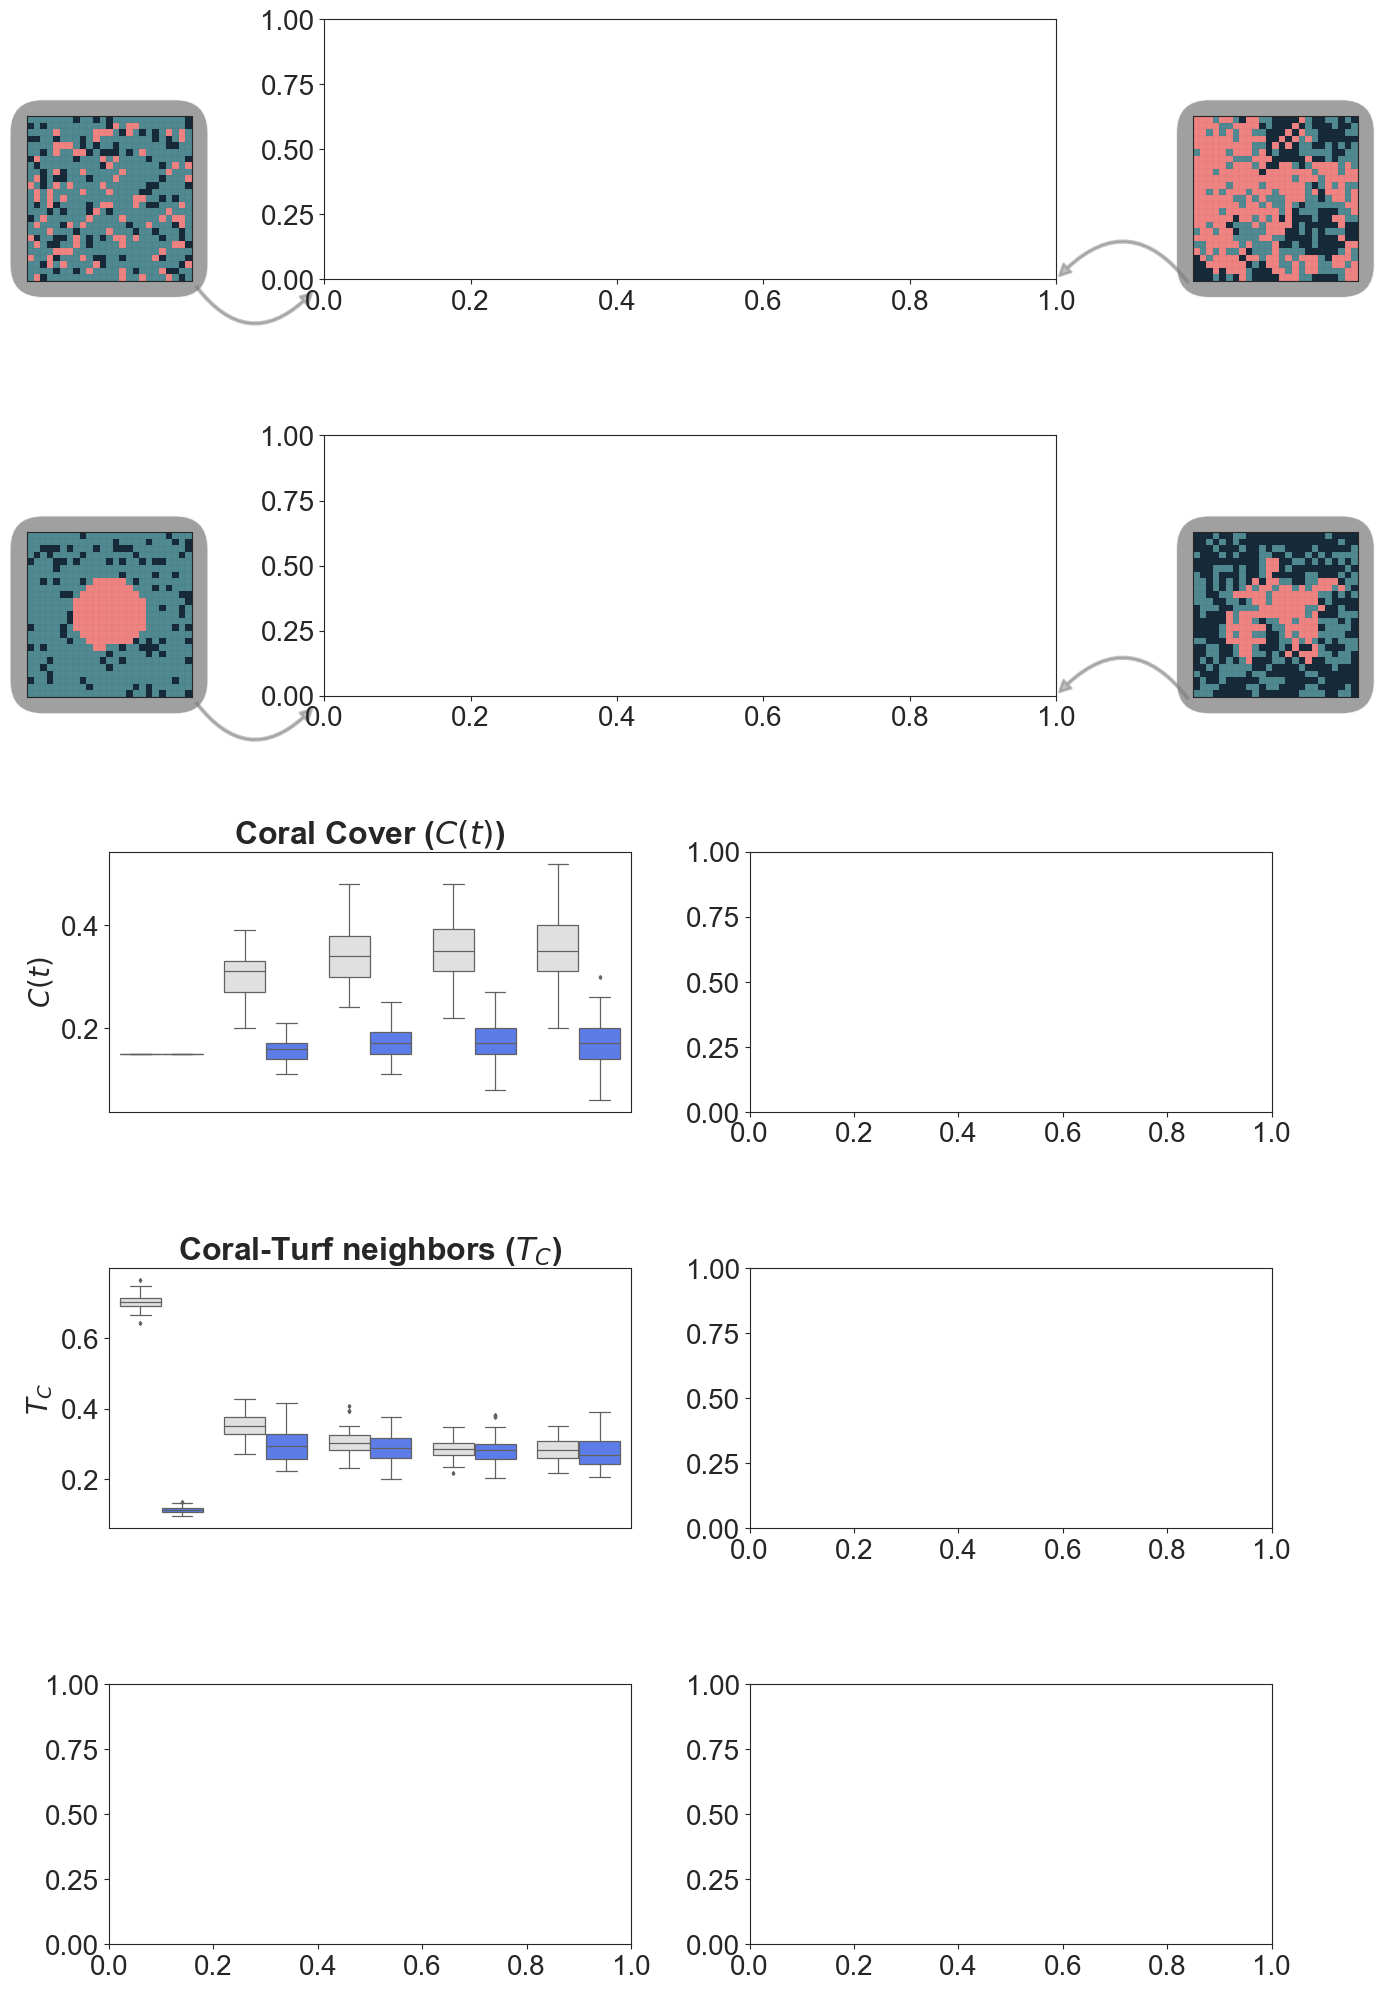

In [26]:

sns.boxplot(x="time", y="coral_turf_neighbors",
            hue="initial configuration", data=df[df['time'].isin(times)],
            palette=profile_palette, linewidth=.9, flierprops=dict(markersize=2), ax=ax4[0]
            )

ax4[0].set_ylabel('$T_C$', fontdict=subtitle_text_params)
ax4[0].set_xticks([])
ax4[0].set_xlabel('')
ax4[0].get_legend().set_title('')
ax4[0].legend([], [], frameon=False)

ax4[0].set_title('Coral-Turf neighbors ($T_C$)', fontdict=title_text_params)
fig


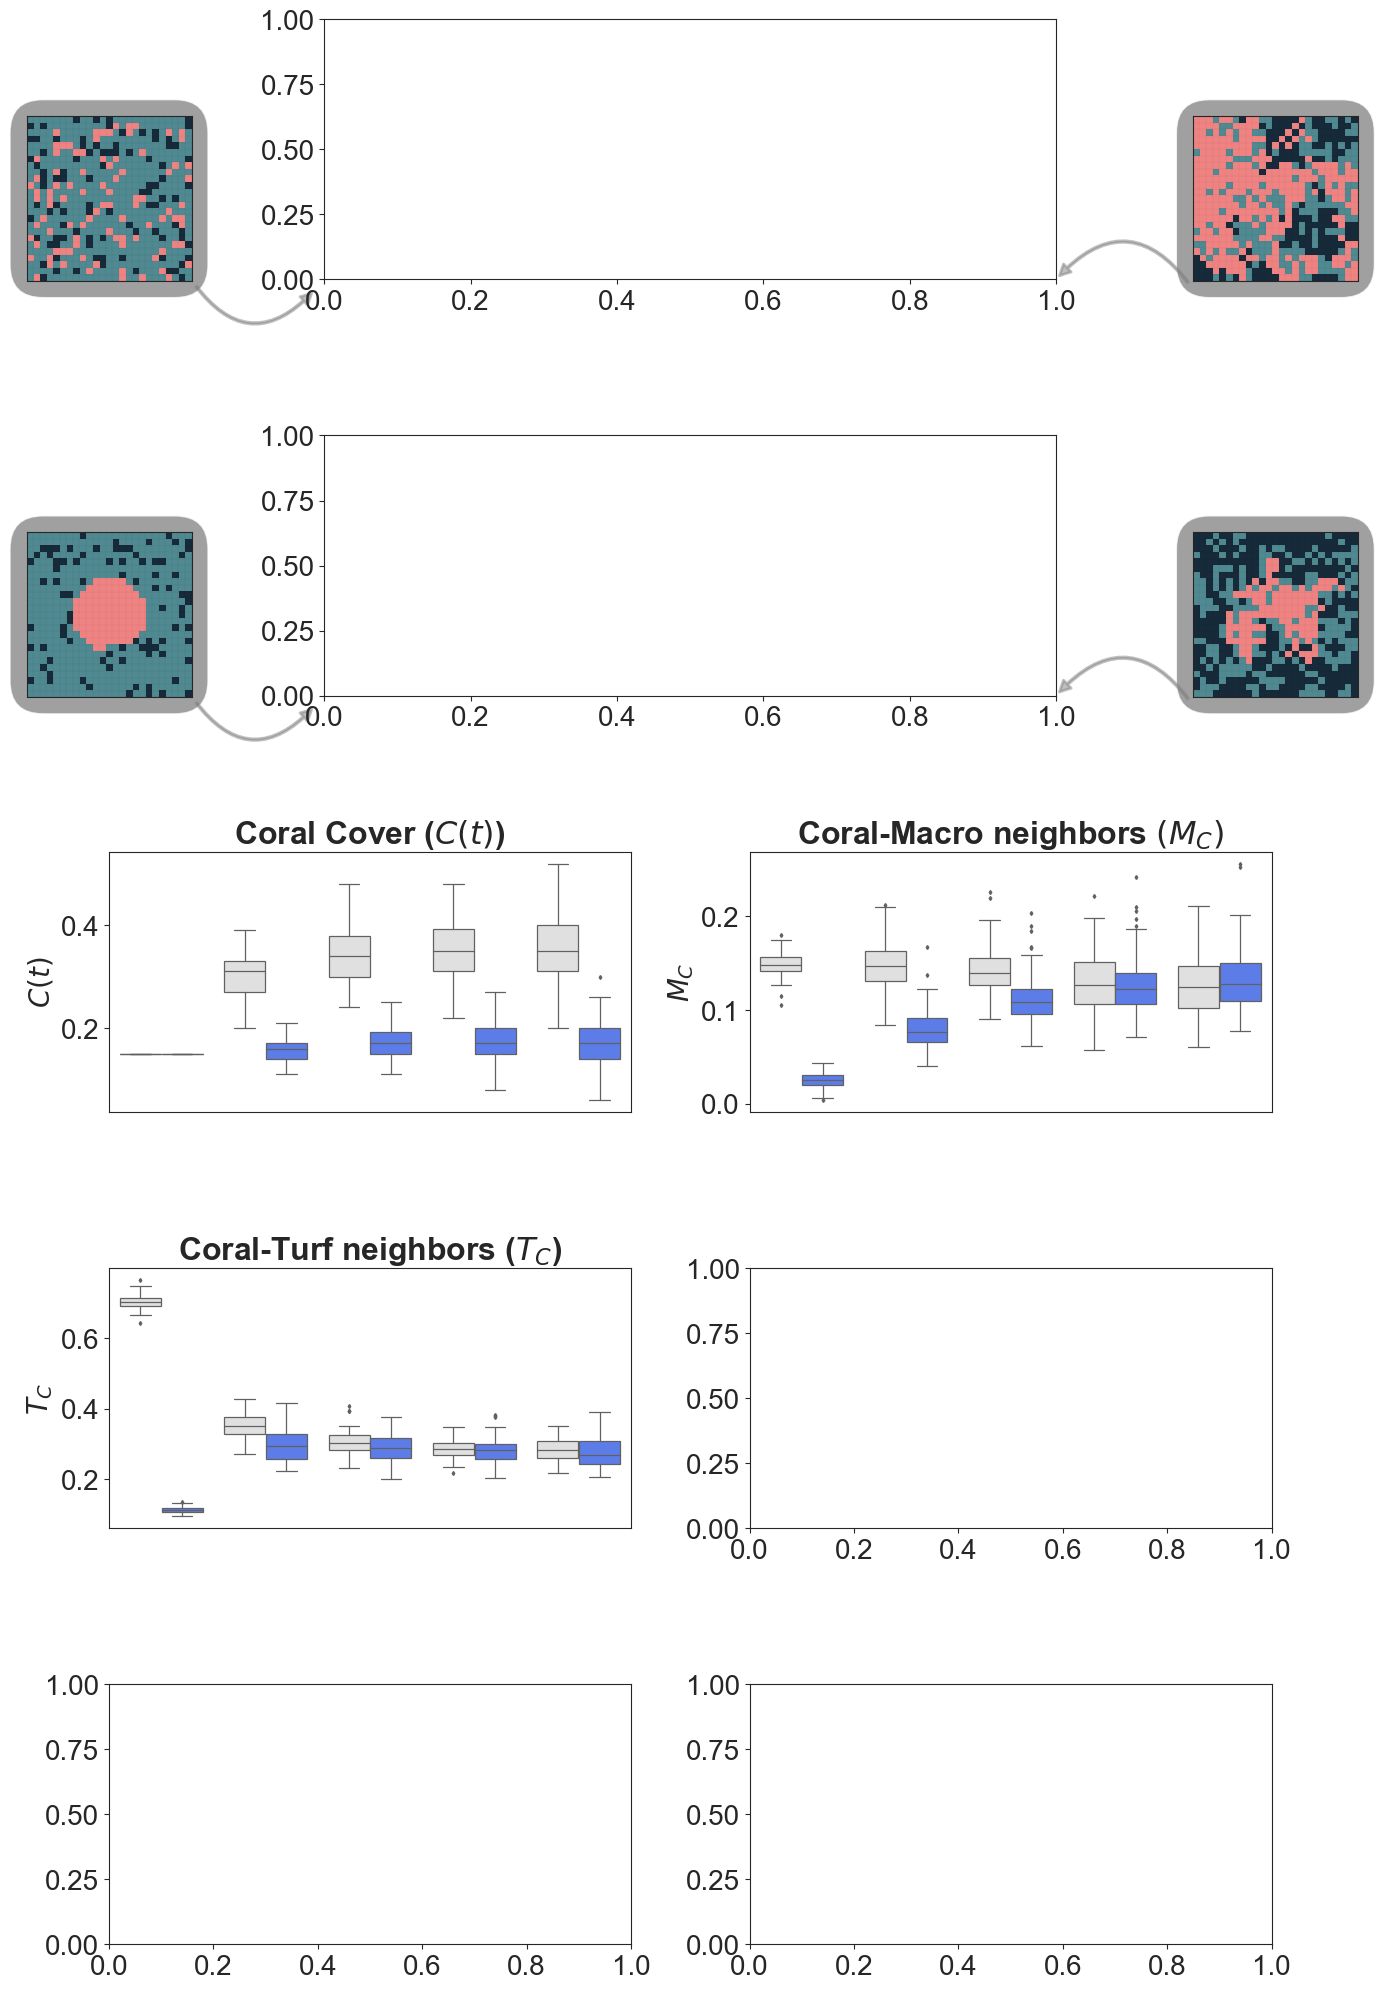

In [27]:

sns.boxplot(x="time", y="coral_macro_neighbors",
            hue="initial configuration", data=df[df['time'].isin(times)],
            palette=profile_palette, linewidth=.9, flierprops=dict(markersize=2), ax=ax3[1]
            )

ax3[1].set_ylabel('$M_C$', fontdict=subtitle_text_params)
ax3[1].set_xticks([])
ax3[1].set_xlabel('')

ax3[1].get_legend().set_title('')
ax3[1].set_xticks([])

ax3[1].set_xlabel('')
ax3[1].set_title('Coral-Macro neighbors $(M_C)$', fontdict=title_text_params)
ax3[1].legend([], [], frameon=False)

fig


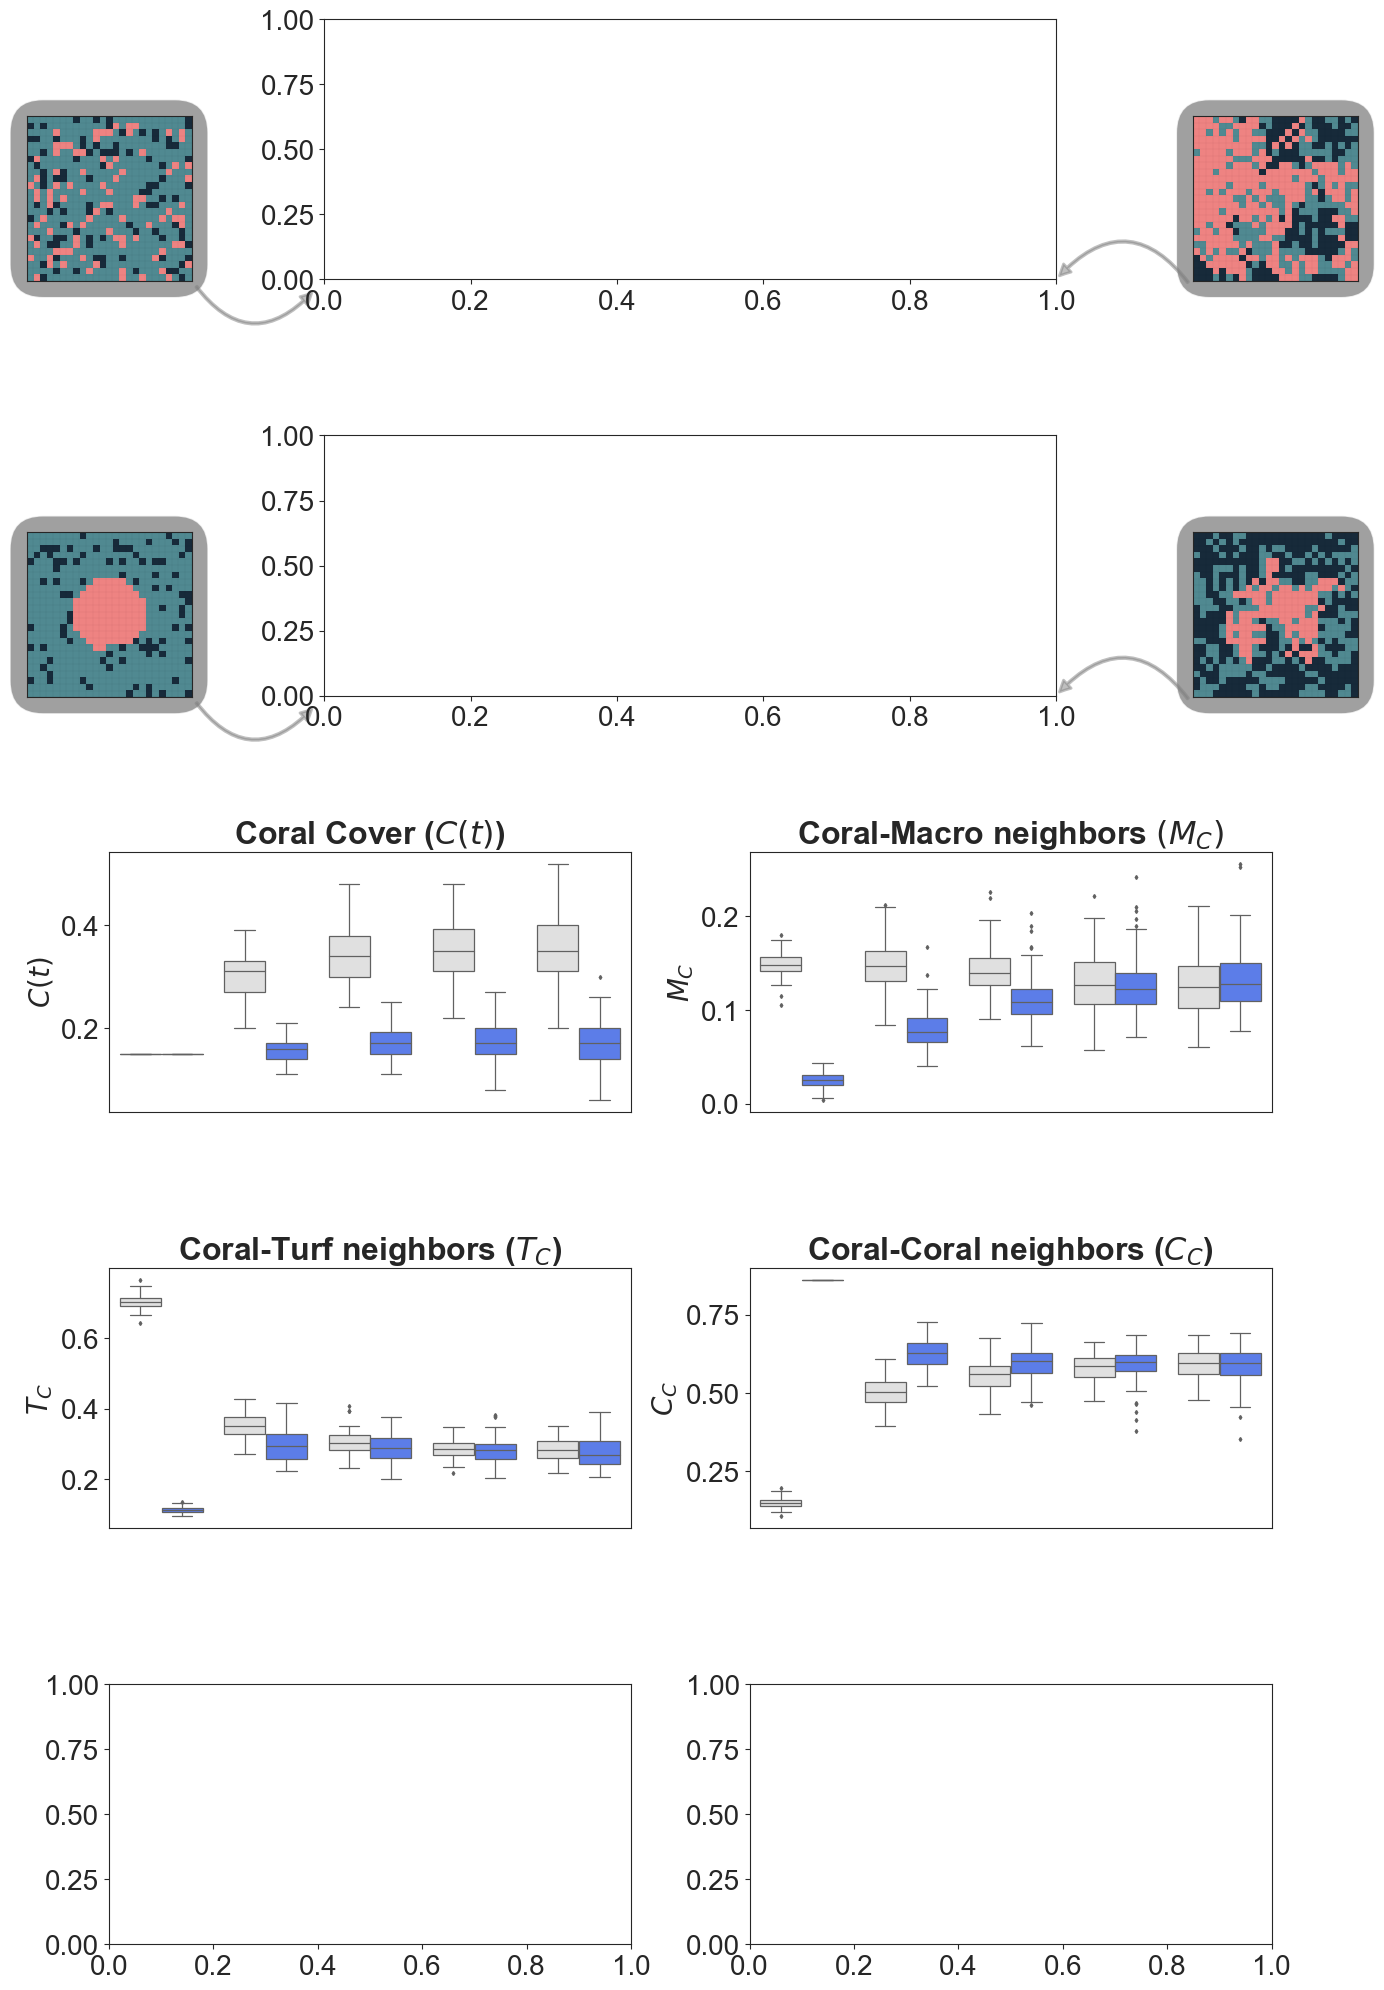

In [28]:

sns.boxplot(x="time", y="coral_coral_neighbors",
            hue="initial configuration", data=df[df['time'].isin(times)],
            palette=profile_palette, linewidth=.9, flierprops=dict(markersize=2), ax=ax4[1]
            )

ax4[1].set_ylabel('$C_C$', fontdict=subtitle_text_params)
ax4[1].set_xticks([])
ax4[1].set_xlabel('')
ax4[1].set_xticks([])

ax4[1].set_title('Coral-Coral neighbors ($C_C$)', fontdict=title_text_params)

ax4[1].get_legend().set_title('')
ax4[1].legend([], [], frameon=False)

fig


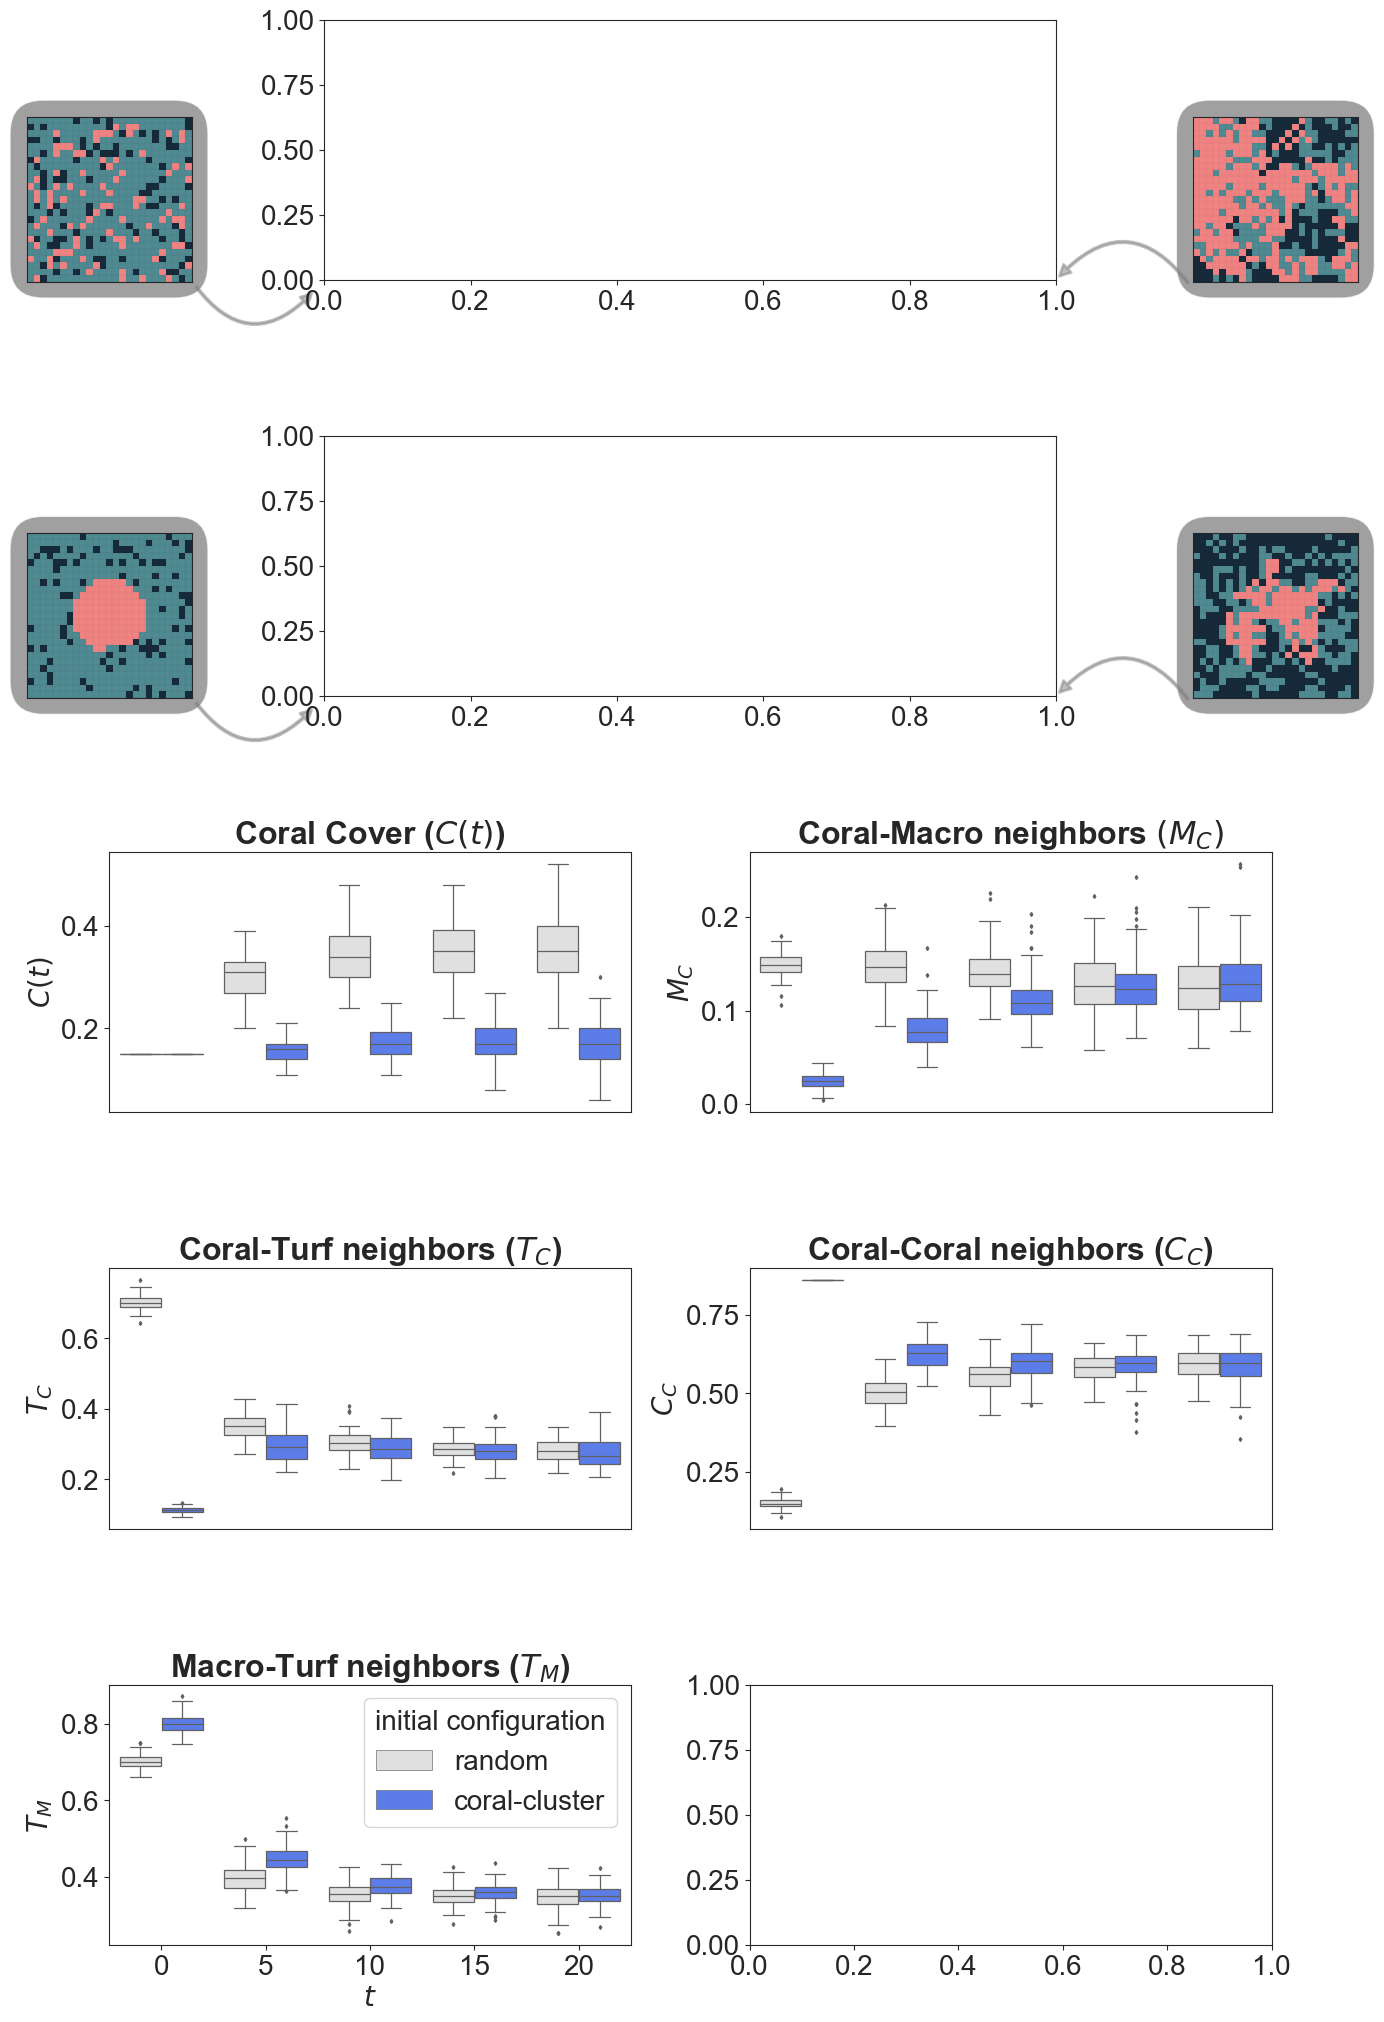

In [29]:

sns.boxplot(x="time", y="macro_turf_neighbors",
            hue="initial configuration", data=df[df['time'].isin(times)],
            palette=profile_palette, linewidth=.9, flierprops=dict(markersize=2), ax=ax5[0],
            )
ax5[0].set_ylabel('$T_M$', fontdict=subtitle_text_params)

ax5[0].set_xticklabels(labels=ax5[0].get_xticklabels(), fontdict=subtitle_text_params)

ax5[0].set_title('Macro-Turf neighbors ($T_M$)', fontdict=title_text_params)
ax5[0].set_xlabel('$t$', fontdict=subtitle_text_params)
fig

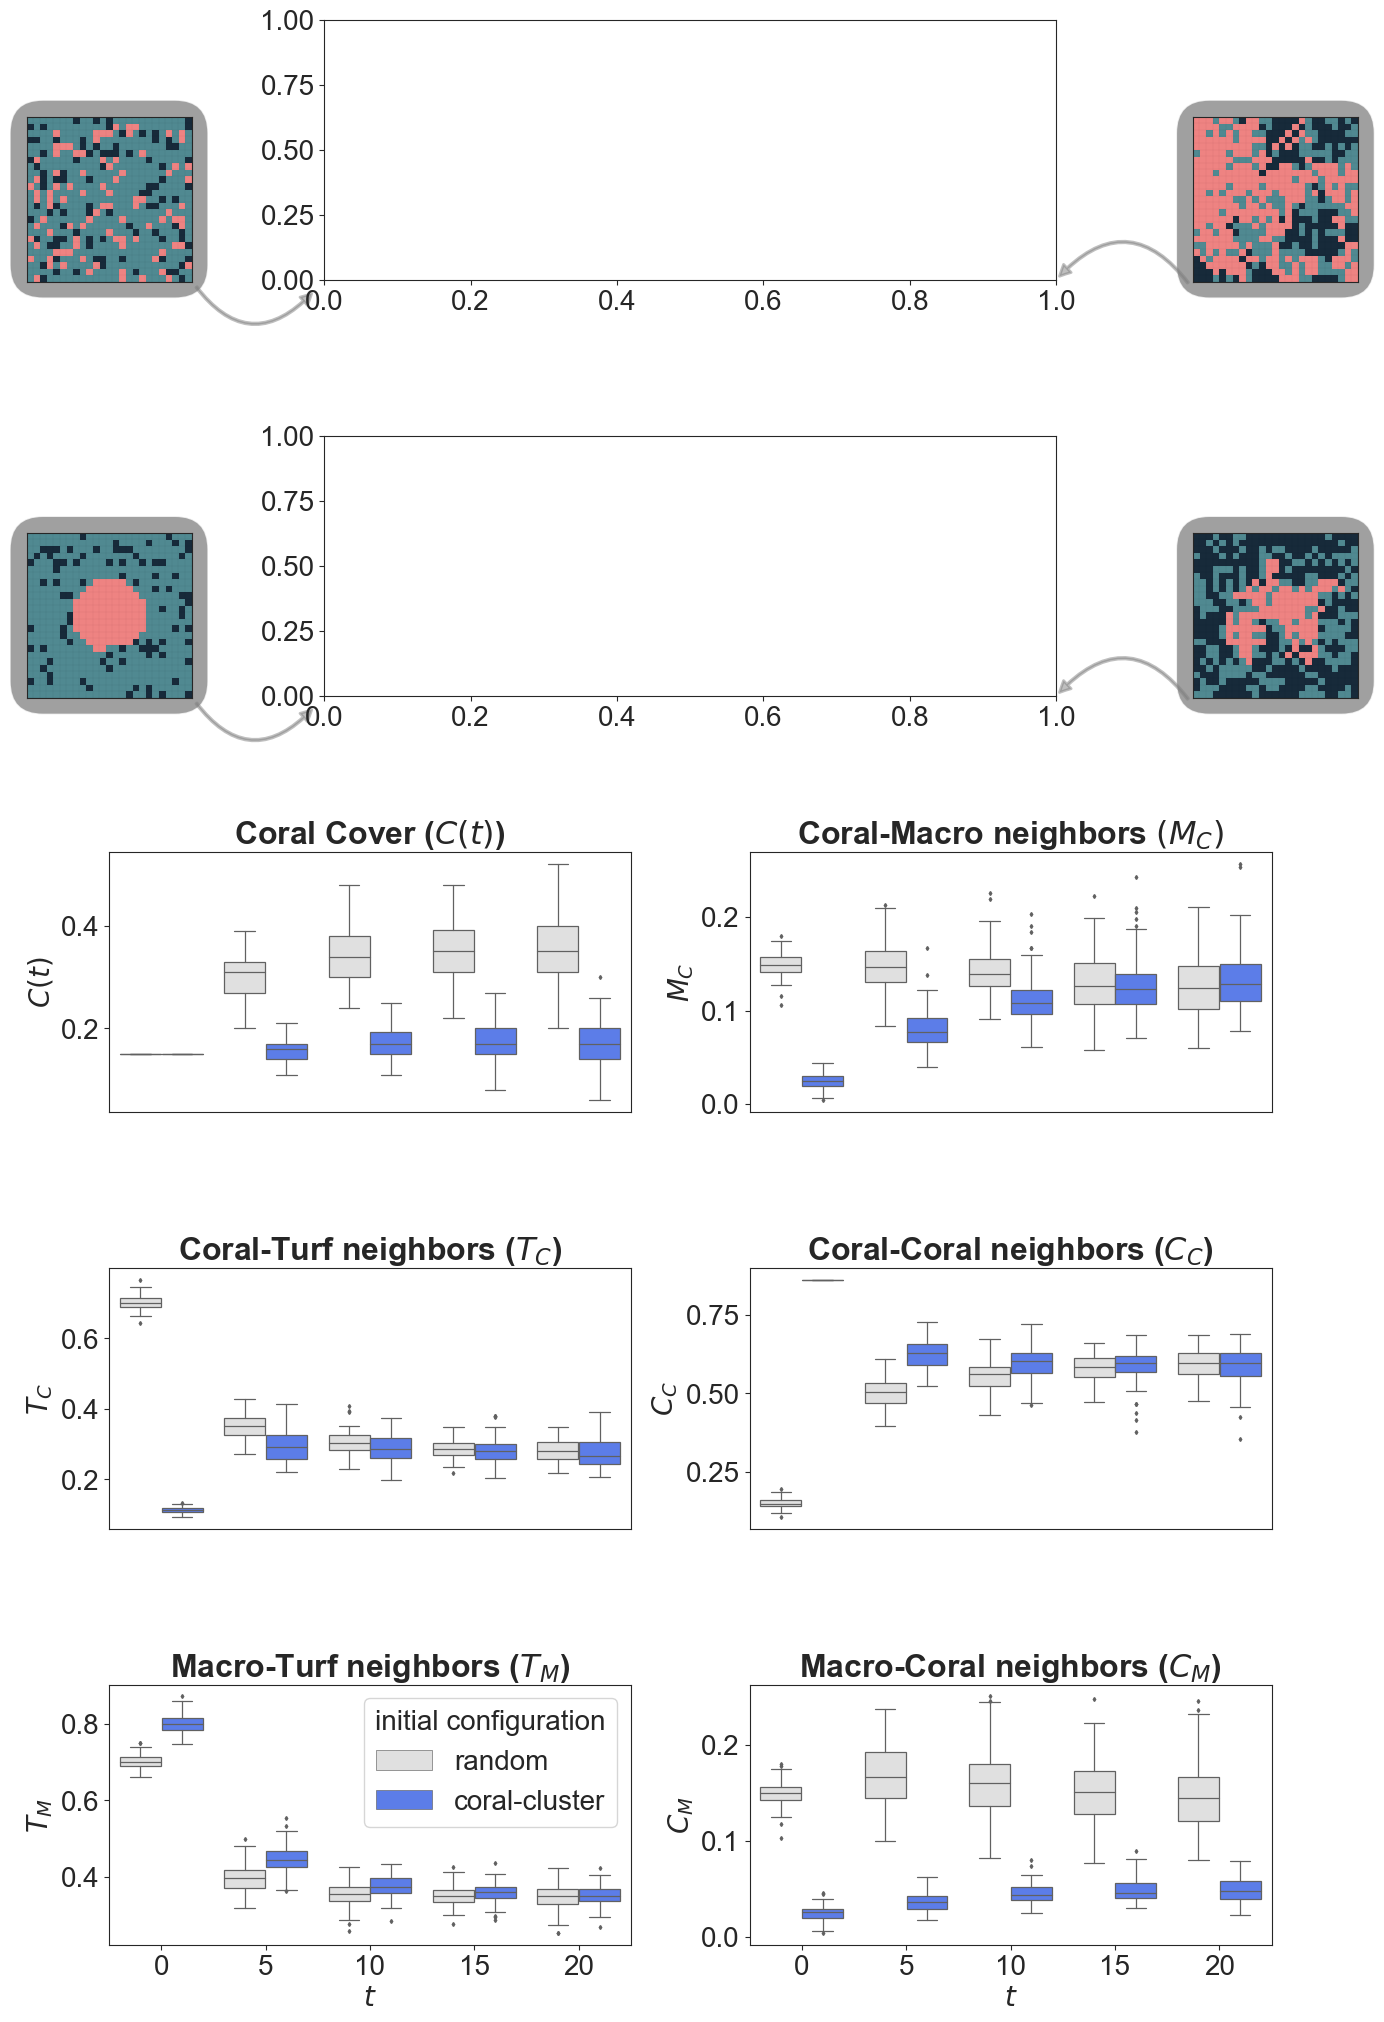

In [30]:

sns.boxplot(x="time", y="macro_coral_neighbors",
            hue="initial configuration", data=df[df['time'].isin(times)],
            palette=profile_palette, linewidth=.9, flierprops=dict(markersize=2), ax=ax5[1],
            )
ax5[1].set_ylabel('$C_M$', fontdict=subtitle_text_params)

ax5[1].get_legend().set_title('')
ax5[1].set_xticklabels(labels=ax5[1].get_xticklabels(), fontdict=subtitle_text_params)

ax5[1].set_title('Macro-Coral neighbors ($C_M$)', fontdict=title_text_params)
ax5[1].set_xlabel('$t$', fontdict=subtitle_text_params)
ax5[1].legend([], [], frameon=False)
fig


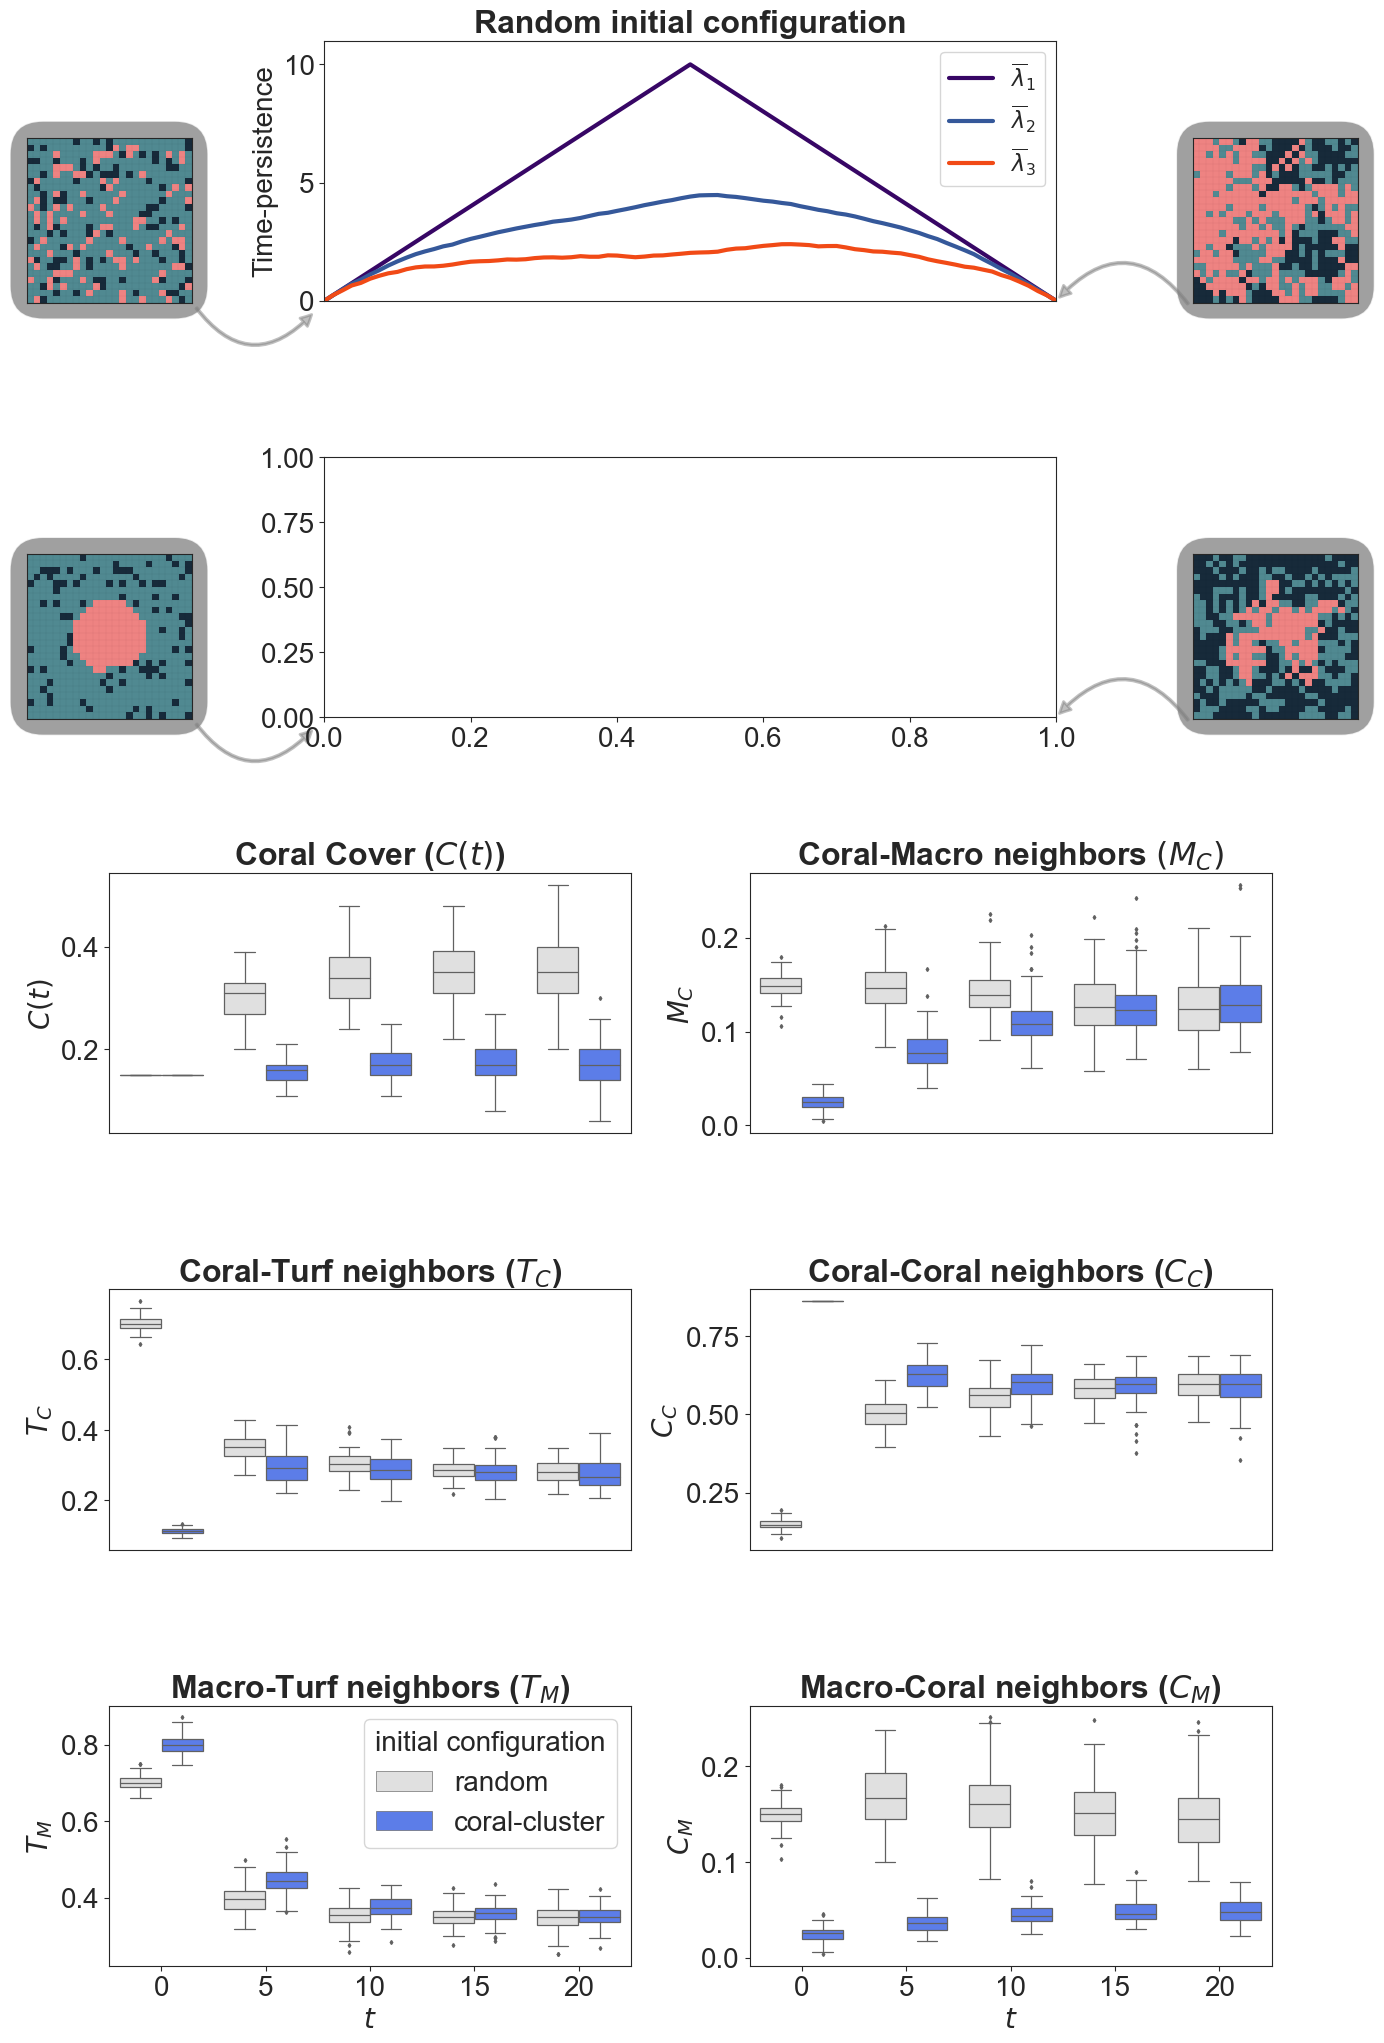

In [31]:

# For figure 4

# Set parameters that were used in PL_grazing.sh
lwidth = 3

landscape_colors = ['#370665', '#35589A', '#F14A16', '#FC9918']
labels = ['$\overline{\lambda}_1$', '$\overline{\lambda}_2$', '$\overline{\lambda}_3$']
landscape_path = './output/25x25/grid0/grazing53/threshold146/bars/average.land'
landscape_cps = TDAtl.get_landscape_critical_points(landscape_path)
for i in range(3):
    critical_points = np.array(landscape_cps[i])
    lines = ax1[1].plot(critical_points[:, 0], critical_points[:, 1], color=landscape_colors[i % len(landscape_colors)],
                        label=labels[i], linewidth=lwidth)

ax1[1].set_xlim([0, 20])
ax1[1].set_ylabel('Time-persistence', fontdict=subtitle_text_params, zorder=1)

ax1[1].set_ylim([0, 1 + 20 / 2])
ax1[1].set_xticks([])
yticks = [0, 5, 10]

ax1[1].set_yticks(yticks)
ax1[1].set_yticklabels(labels=yticks, fontdict=subtitle_text_params)
xleft, xright = ax1[2].get_xlim()
ybottom, ytop = ax1[2].get_ylim()
ax1[1].legend(loc='upper right', prop={'size': 16})
ax1[1].set_zorder(0)
ax1[1].set_facecolor('none')
ax1[1].set_title("Random initial configuration", fontdict=title_text_params)

fig

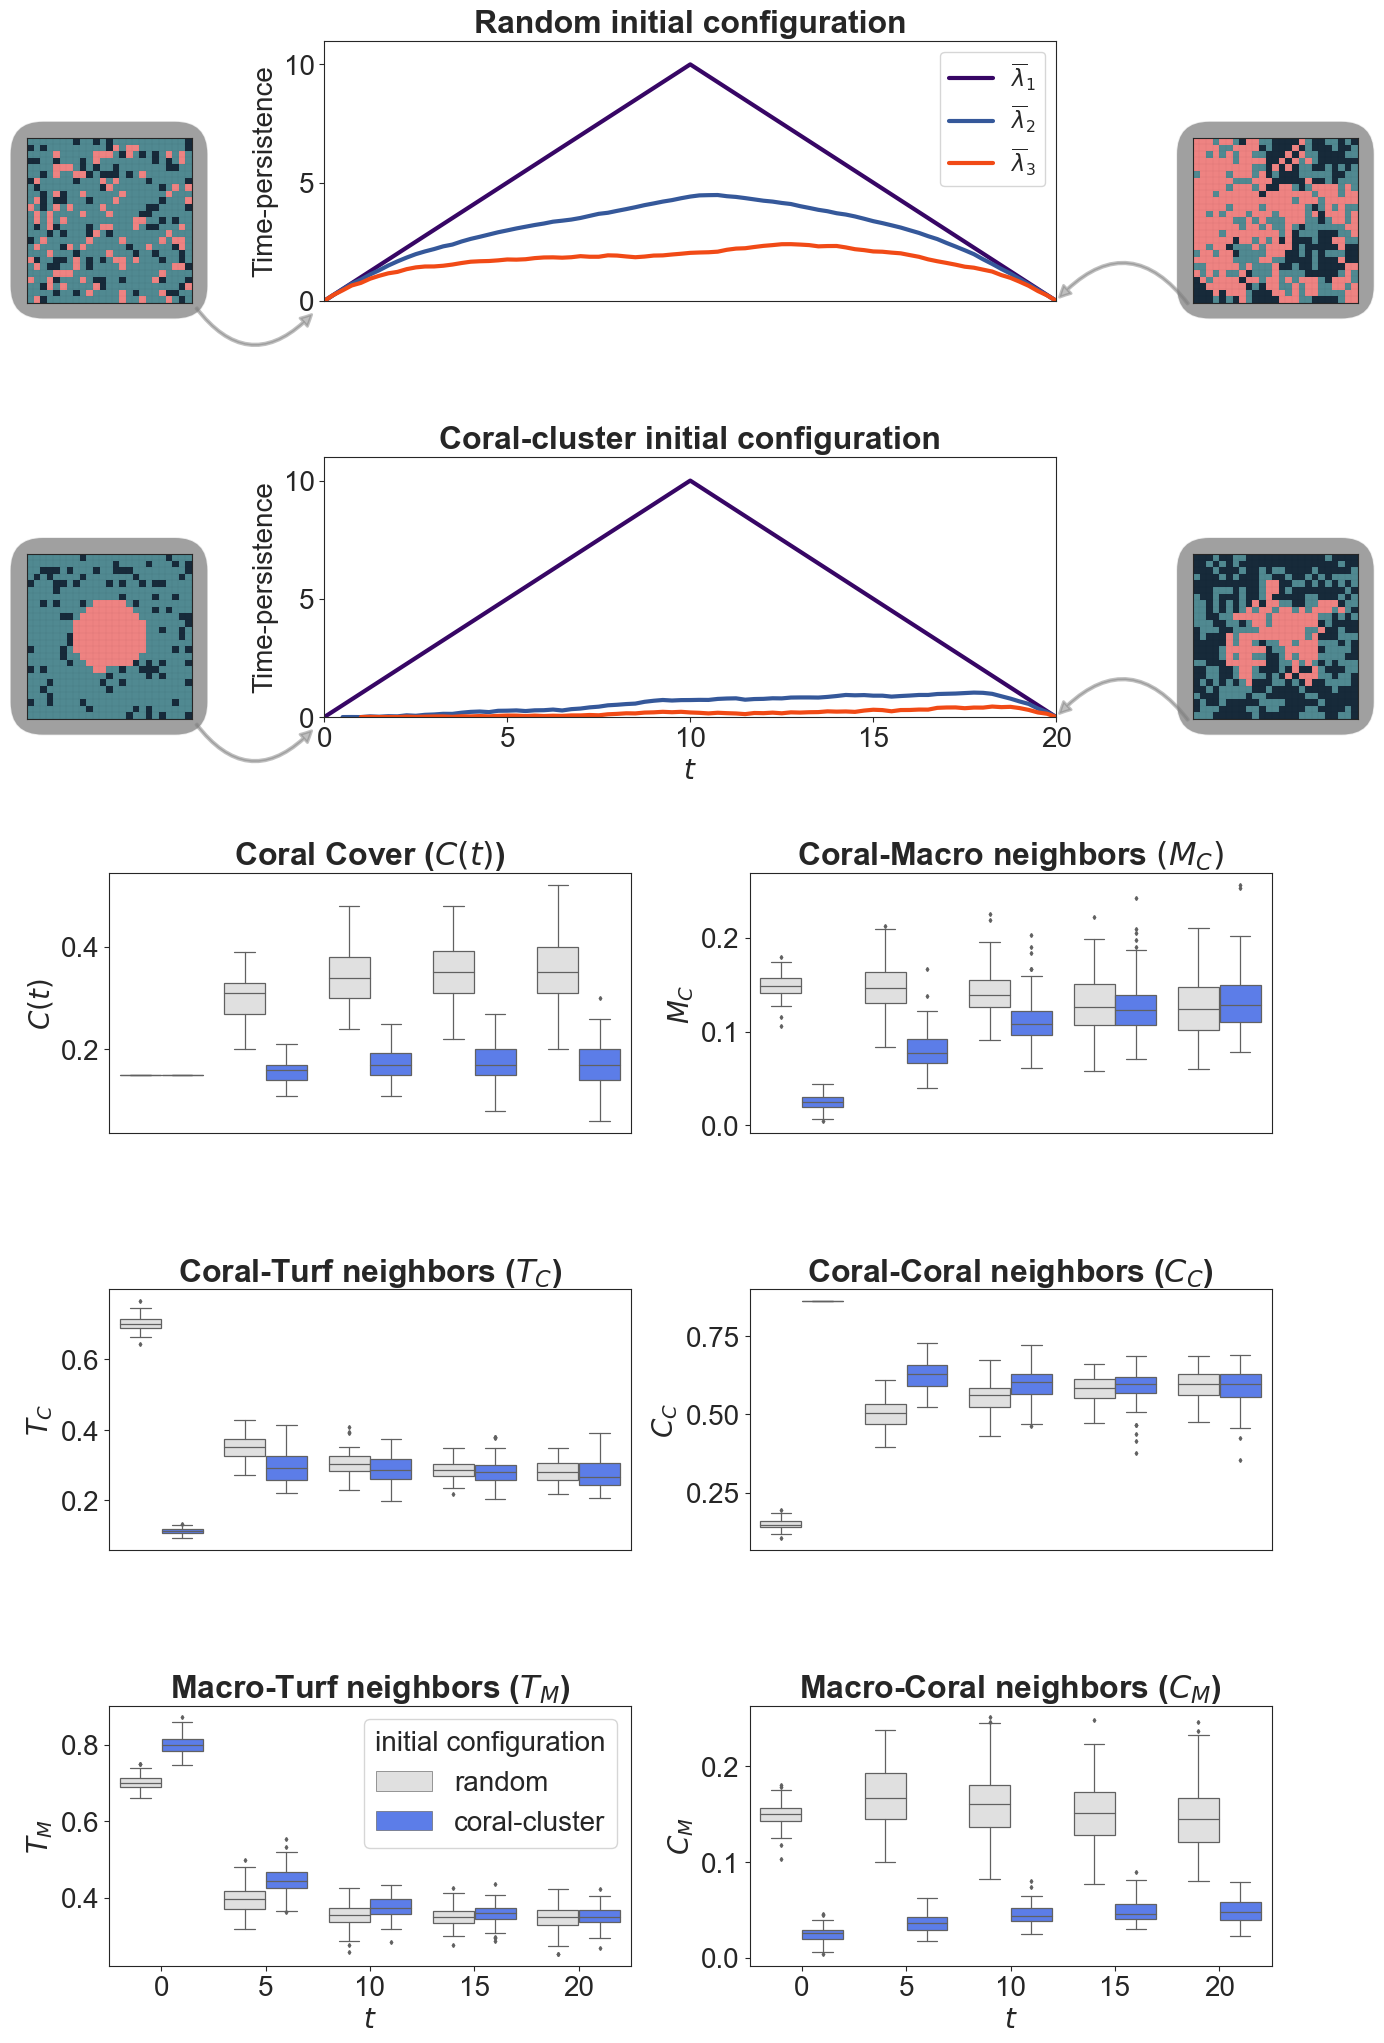

In [32]:

# For figure 4

# Set parameters that were used in PL_grazing.sh


landscape_colors = ['#370665', '#35589A', '#F14A16', '#FC9918']
landscape_path = './output/25x25/grid2/grazing53/threshold146/bars/average.land'
landscape_cps = TDAtl.get_landscape_critical_points(landscape_path)
for i in range(3):
    critical_points = np.array(landscape_cps[i])
    lines = ax2[1].plot(critical_points[:, 0], critical_points[:, 1], color=landscape_colors[i % len(landscape_colors)],
                        label=labels[i], linewidth=lwidth)

ax2[1].set_xlim([0, 20])
ax2[1].set_xlabel('$t$', fontdict=subtitle_text_params)
ax2[1].set_ylabel('Time-persistence', fontdict=subtitle_text_params)
xticks = [0, 5, 10, 15, 20]
yticks = [0, 5, 10]
ax2[1].set_ylim([0, 1 + 20 / 2])
ax2[1].set_xticks(xticks)
ax2[1].set_yticks(yticks)
ax2[1].set_xticklabels(labels=xticks, fontdict=subtitle_text_params)
ax2[1].set_yticklabels(labels=yticks, fontdict=subtitle_text_params)
xleft, xright = ax2[1].get_xlim()
ybottom, ytop = ax2[1].get_ylim()

ax2[1].set_zorder(1)
ax2[1].set_facecolor('none')
ax2[1].set_title("Coral-cluster initial configuration", fontdict=title_text_params)

fig

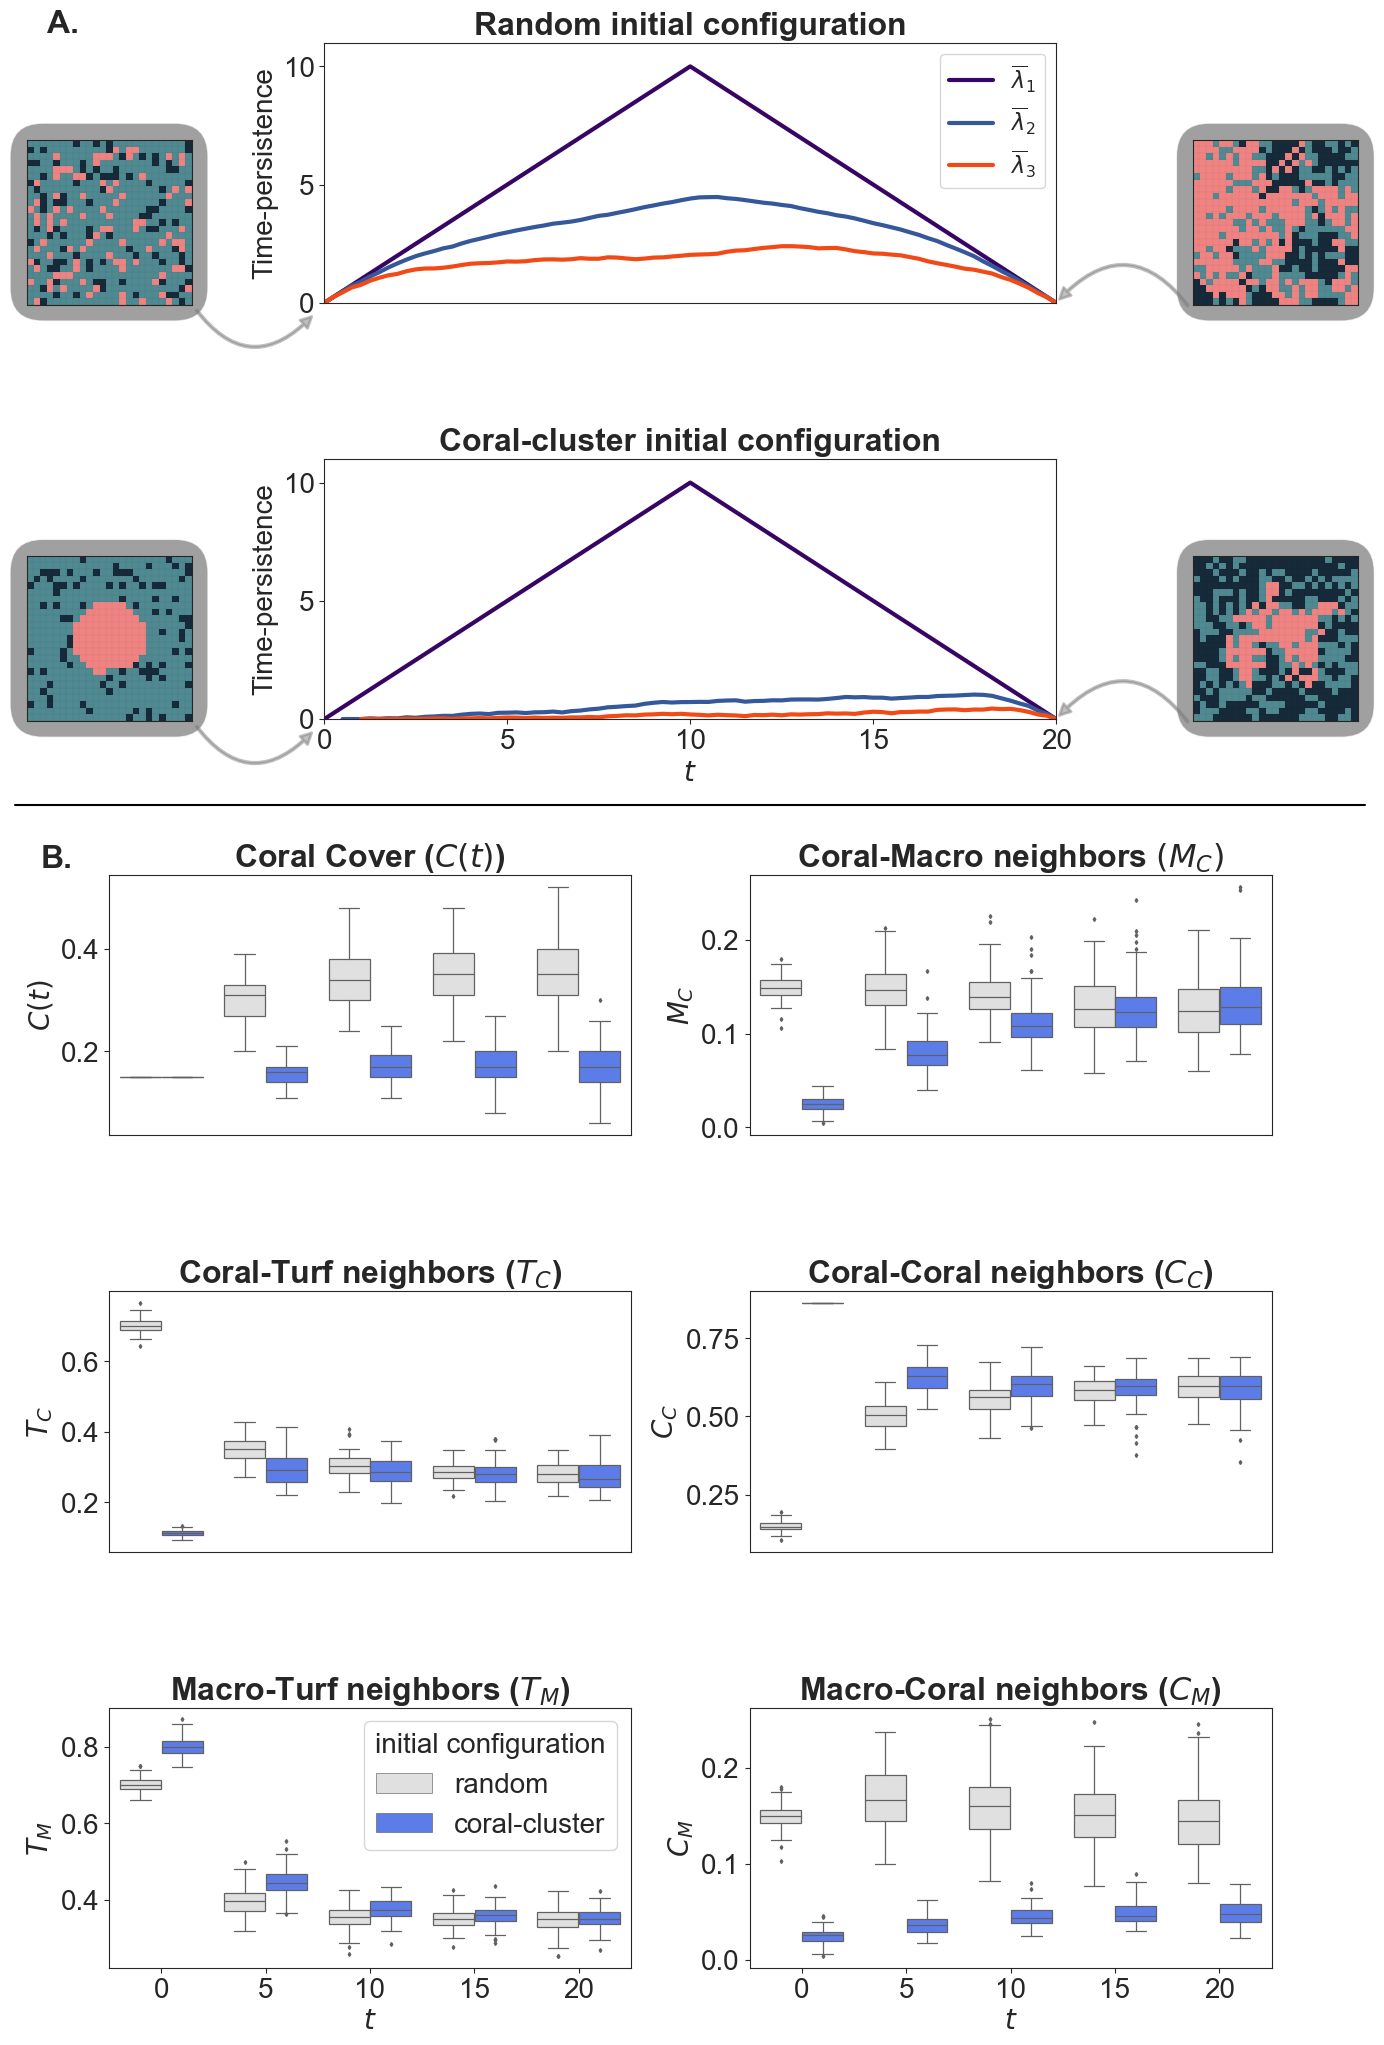

In [33]:

plot_line1 = plt.Line2D([.0625, .9625], [.575, .575], color="black")
fig.add_artist(plot_line1)

ax1[0].text(5, -18, 'A.', ha='center', va='center', fontdict=heading_text_params)
ax3[0].text(-1, 0.575, 'B.', ha='center', va='center', fontdict=heading_text_params)

fig

In [34]:
fig.savefig('./figures/paper/4_initial_profile/fig4.pdf',bbox_inches='tight')
